In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.palettes import Category10_10

# Read the CSV file with counts
df = pd.read_csv('unique_words_ZH_nonToxic.csv')


# Zhōngwén

## Tone

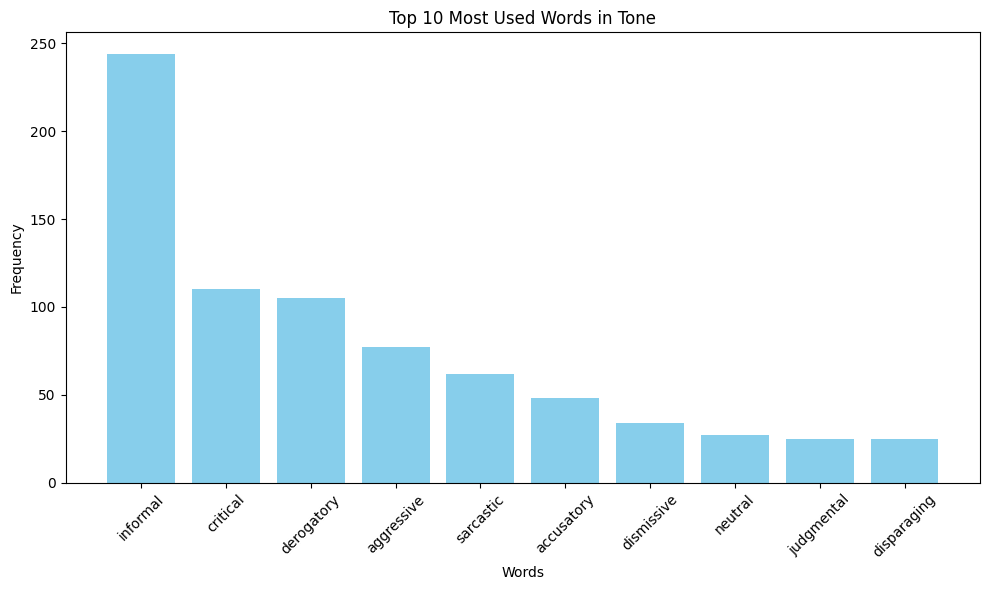

          Tone  Tone appears
0     informal         244.0
1     critical         110.0
2   derogatory         105.0
3   aggressive          77.0
4    sarcastic          62.0
5   accusatory          48.0
6   dismissive          34.0
7      neutral          27.0
8   judgmental          25.0
9  disparaging          25.0


In [2]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

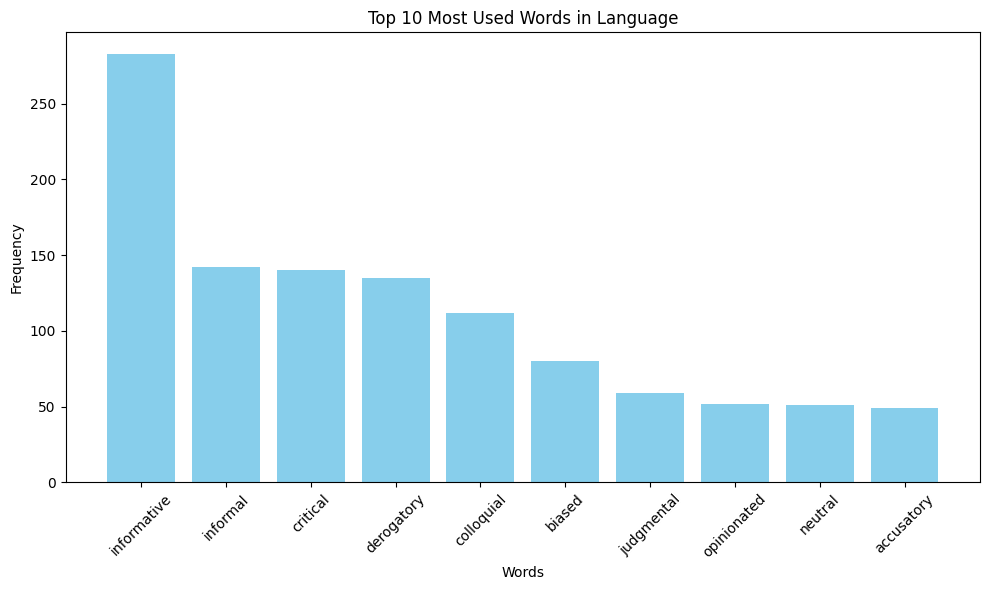

      Language  Language appears
0  informative             283.0
1     informal             142.0
2     critical             140.0
3   derogatory             135.0
4   colloquial             112.0
5       biased              80.0
6   judgmental              59.0
7  opinionated              52.0
8      neutral              51.0
9   accusatory              49.0


In [3]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

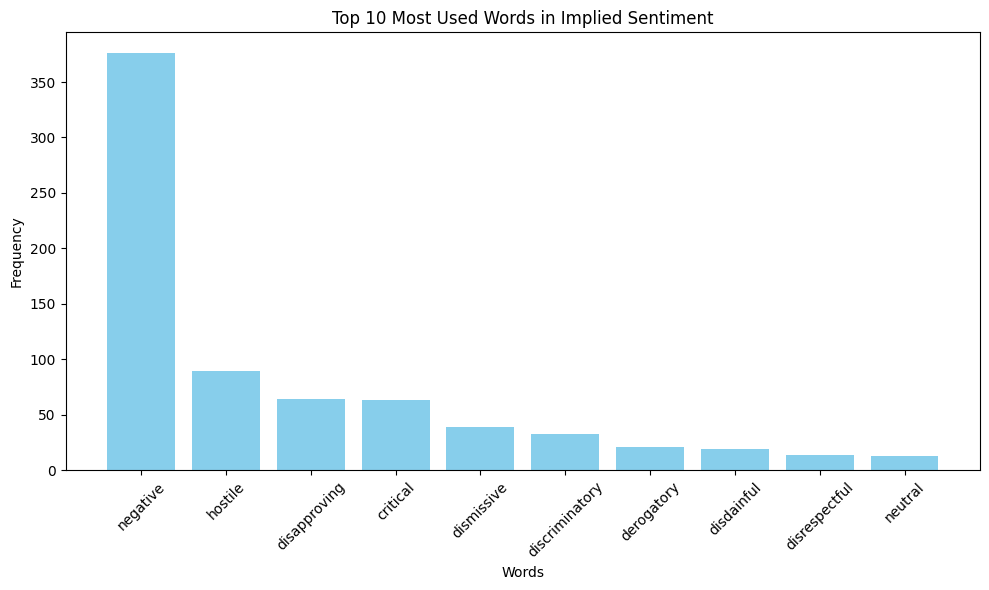

  Implied Sentiment  Implied Sentiment appears
0          negative                      376.0
1           hostile                       89.0
2      disapproving                       64.0
3          critical                       63.0
4        dismissive                       39.0
5    discriminatory                       33.0
6        derogatory                       21.0
7        disdainful                       19.0
8     disrespectful                       14.0
9           neutral                       13.0


In [4]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

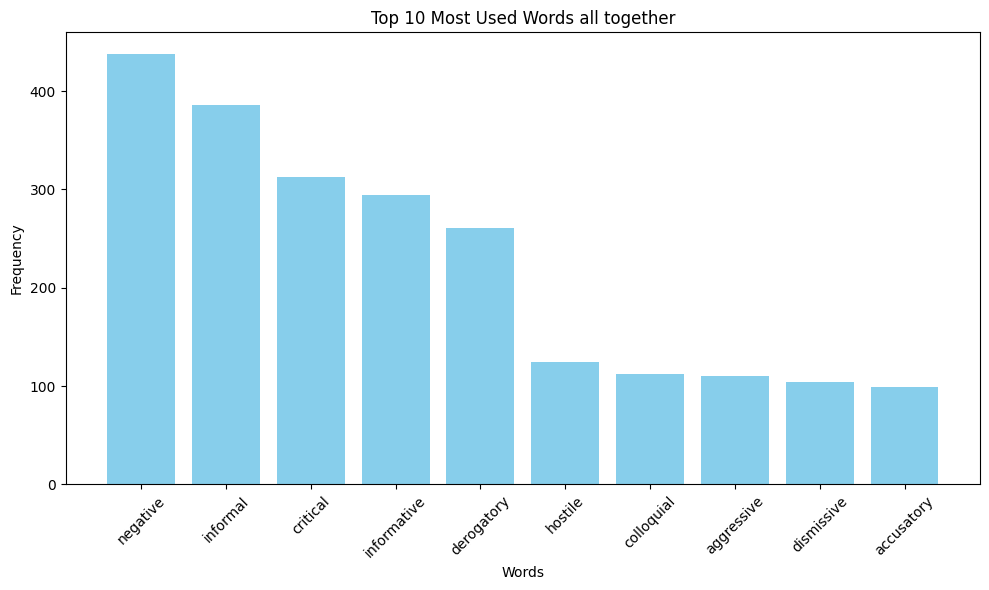

       combine  combine appears
0     negative            438.0
1     informal            386.0
2     critical            313.0
3  informative            294.0
4   derogatory            261.0
5      hostile            124.0
6   colloquial            112.0
7   aggressive            110.0
8   dismissive            104.0
9   accusatory             99.0


In [5]:
# Plot histogram for the 'Combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(combine_df['combine'], combine_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(combine_df)

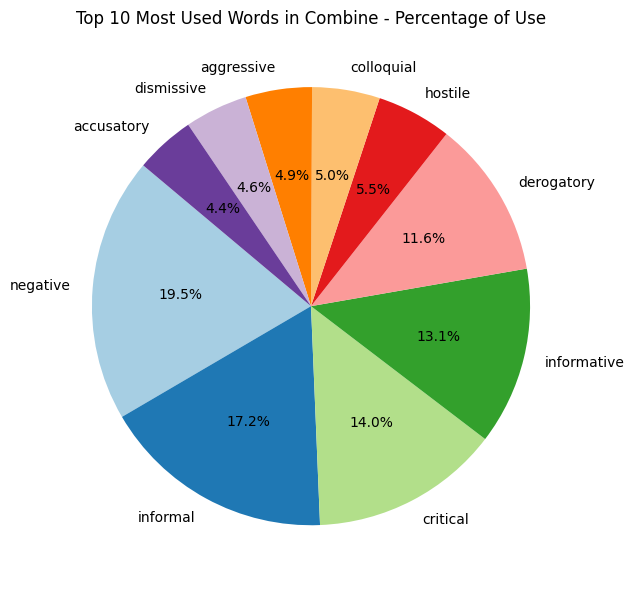

In [6]:
total_sentences = 1000

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

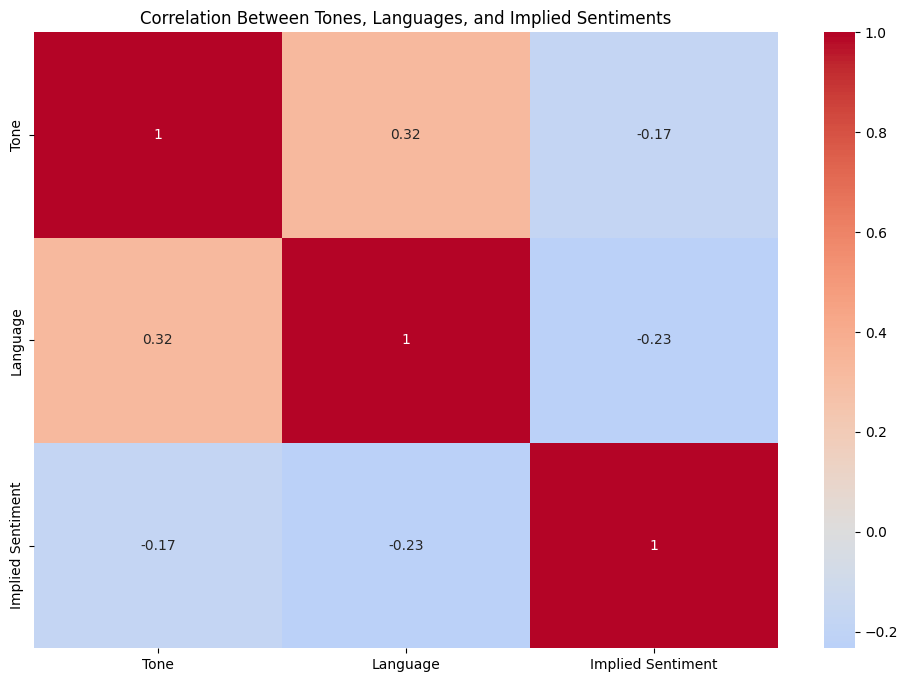

In [7]:
# Combine all data into one DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'Tone': tone_df.set_index('Tone')['Tone appears'],
    'Language': language_df.set_index('Language')['Language appears'],
    'Implied Sentiment': implied_sentiment_df.set_index('Implied Sentiment')['Implied Sentiment appears']
}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Tones, Languages, and Implied Sentiments')
plt.show()

## Toxic Words

In [9]:
df_t = pd.read_csv('ZH-nonToxicWordsList.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

# plt.figure(figsize=(10, 6))
# plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.title('Top 10 Most Toxic Words')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
print(df_toxic)

  uniq sequences  number appears
0             反感              88
1             极端              79
2             黑人              74
3            不明智              58
4             不适              46
5           none              44
6            不喜欢              36
7         没有自知之明              28
8       自我感觉过于良好              25
9             卑微              24
